In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from src.EXPM import EXPM
from src.CascadeBandit import CascadeBandit
from src.UCB import UCBM
from env.bandit_env import MAB_Bernoulli
from src.bandit_utils import play_all
from src.UCB import UCBM
from src.comband import CombBand

In [2]:
rng = np.random.default_rng(seed = 42)
T = 10_000
N = 10
K = 20
M_list = [2,3,4,5,6,7,8,9,10]

corruption = int(np.sqrt(T))

res_list = []

for M in tqdm(M_list):
    env = MAB_Bernoulli(K, M, corruption = corruption)
    expm = EXPM(K, M)
    casc = CascadeBandit(K, M, method='UCB')
    casc_kl = CascadeBandit(K, M, method='KL-UCB')
    cb = CombBand(K,M)
    #
    res = play_all(env, [cb, expm, casc, casc_kl], T, N, disable_tqdm_T = True)
    res_list += [res]

  0%|          | 0/9 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent ComBand:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/10 [00:00<?, ?it/s]

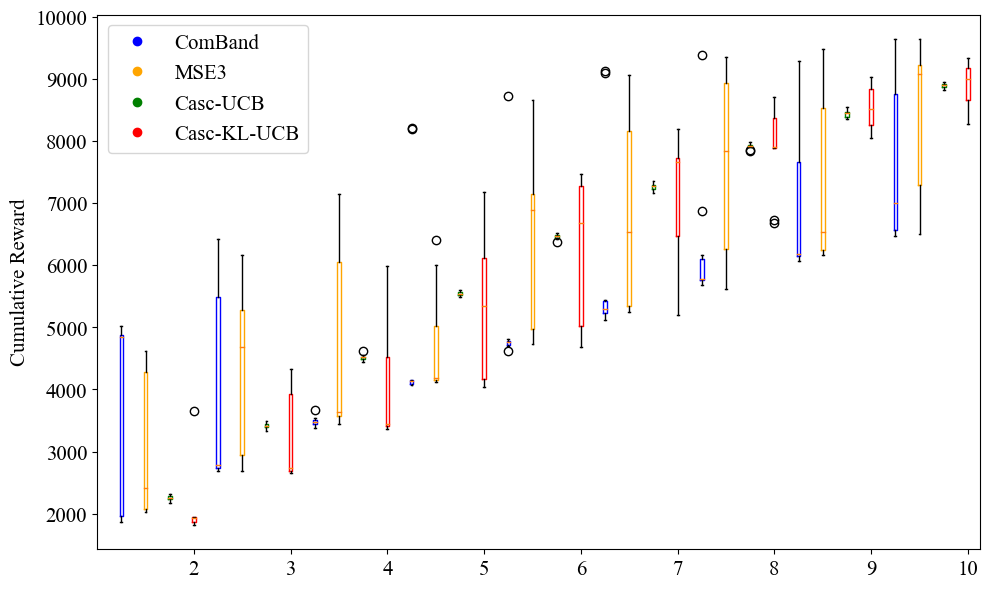

In [19]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
fig, ax = plt.subplots(figsize=(10, 6))
tot = []

colors = {
    'ComBand':'blue', 'MSE3':'orange','Casc-UCB':'green', 'Casc-KL-UCB':'red'
}

for en,i in enumerate(res_list):
    for en2, (label, res_dict) in enumerate(i,1):
        ind = (en * 4) + en2
        data = np.cumsum(res_dict, axis=1)[:, -1]
        tot += [data]

        # Plot boxplot with specified color
        ax.boxplot([data], positions=[ind], boxprops=dict(color=colors[label]))

ax.set_ylabel("Cumulative Reward", fontname='Times New Roman', fontsize=15)
ax.set_xticks(np.arange(len(tot)))
#labels = [a for a,_ in res] * 10
labels = [ [i,i,i,i] for i in range(2,11)]
labels = np.array([item for sublist in labels for item in sublist])

plt.yticks(fontname='Times New Roman',
    fontsize = 15)
plt.xticks(
    np.arange(4, len(labels)+4, 4), 
    np.arange(2,11),
    fontname='Times New Roman',
    fontsize = 15
)

legend_labels = [i for i,_ in res_list[0]]
custom_legend = [plt.Line2D([0], [0], marker='o', color=colors[label], label=label, linestyle='None') for label in colors.keys()]
ax.legend(handles=custom_legend, prop={'family': 'Times New Roman', 'size':15})

fig.tight_layout()
fig.savefig('./results/varying/bern_corr_vary.pdf')